📌 `Maximizing On-Time Arrival Rate (OTAR)` for IndiGo Airlines – U.S. Domestic Operations As IndiGo Airlines into the U.S. domestic aviation market, operational efficiency becomes critical to building a reputation in a competitive landscape. This project aims to analyze U.S. flight operations data to uncover key drivers influencing OTAR —a vital metric for customer satisfaction and cost-effective performance. It will also dissect OTAR into actionable components to address systemic inefficiencies, predict seasonal disruptions, and enable reliable service delivery.

By conducting Exploratory data analysis (EDA), validating hypotheses, and visualizing trends, this analysis aims to surface data-driven insights and operational levers that can help IndiGo optimize OTAR and gain a strategic edge in the U.S. market.

In [1]:
##Step 1: Install Required Libraries
!pip install gdown # Downloads files directly from Google Drive
!pip install openpyxl # It assists to read/write Excel (.xlsx) files using pandas

##Step 2: Import Essential Python Libraries
# 'gdown' is used to download files from Google Drive
import gdown

# 'pandas' is used for data manipulation and analysis
import pandas as pd

# 'numpy' is used for numerical operations
import numpy as np

# 'matplotlib.pyplot' and 'seaborn' are used for creating visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 'warnings' helps ignore warning messages that can clutter the output
import warnings
warnings.filterwarnings('ignore')  # This will hide warnings for a cleaner output


##Step 3: Set the file ID and create a download URL
file_id = "1EVaaJi4SqJ6V1U_KA_d1xEU-SOnUEV_3"
download_url = f"https://drive.google.com/uc?id={file_id}"

##Step 4: Set the output file name
output_file = "flights_dataset.csv"

##Step 5: Download the file
gdown.download(download_url, output_file, quiet=False)

##Step 6: Load the CSV file into a Pandas DataFrame
data = pd.read_csv(output_file)

Downloading...
From (original): https://drive.google.com/uc?id=1EVaaJi4SqJ6V1U_KA_d1xEU-SOnUEV_3
From (redirected): https://drive.google.com/uc?id=1EVaaJi4SqJ6V1U_KA_d1xEU-SOnUEV_3&confirm=t&uuid=8875ec1c-19a3-4f15-a15c-febfb0cfd59b
To: /content/flights_dataset.csv
100%|██████████| 592M/592M [00:07<00:00, 83.3MB/s]


In [2]:
#Loading Mapping Datasets
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')

#Creates a dictionary to map airline codes to full names
airline_mapping = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

#Replaces airline codes with full names in the 'AIRLINE' column
data['AIRLINE'] = data['AIRLINE'].map(airline_mapping)

#Similarly for airports
airport_mapping = airports.set_index('IATA_CODE')['AIRPORT'].to_dict()

data['ORIGIN_AIRPORT'] = data['ORIGIN_AIRPORT'].map(airport_mapping)
data['DESTINATION_AIRPORT'] = data['DESTINATION_AIRPORT'].map(airport_mapping)

In [3]:
#Makes a copy of the original dataset to avoid modifying the original data
df = data.copy()

#Get the number of rows and columns in the DataFrame
num_rows, num_columns = df.shape

#Display the dimensions of the DataFrame
print(f"Number of Rows in the Dataset: {num_rows}")
print(f"Number of Columns in the Dataset: {num_columns}")

Number of Rows in the Dataset: 5819079
Number of Columns in the Dataset: 31


In [4]:
print(df.columns) #Displays column names in the dataset

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


📌Data Cleaning: In this context, this step involves preparing and refining the dataset by addressing issues such as address missing flight details, duplicates, inconsistent formats (e.g., time data), and outliers. This step ensures the data is accurate, reliable, and ready for analysis.

Step 1: Preliminary Inspection of Data:

* Check Data types
* Missing Values
* Duplicate records
* Outliers

STEP 1: DEAL WITH DUPLICATES.

In [5]:
#Checking for Duplicate Rows in the dataset
dup_in_data = df.duplicated(subset=['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' ]).sum()

print(f"Duplicate rows in Dataset: {dup_in_data}")

Duplicate rows in Dataset: 0


STEP 2: DEAL WITH MISSING VALUES.

Missing Data Summary:

TAIL_NUMBER: 14721.0 missing (0.25%)
ORIGIN_AIRPORT: 486165.0 missing (8.35%)
DESTINATION_AIRPORT: 486165.0 missing (8.35%)
DEPARTURE_TIME: 86153.0 missing (1.48%)
DEPARTURE_DELAY: 86153.0 missing (1.48%)
TAXI_OUT: 89047.0 missing (1.53%)
WHEELS_OFF: 89047.0 missing (1.53%)
SCHEDULED_TIME: 6.0 missing (0.0%)
ELAPSED_TIME: 105071.0 missing (1.81%)
AIR_TIME: 105071.0 missing (1.81%)
WHEELS_ON: 92513.0 missing (1.59%)
TAXI_IN: 92513.0 missing (1.59%)
ARRIVAL_TIME: 92513.0 missing (1.59%)
ARRIVAL_DELAY: 105071.0 missing (1.81%)
CANCELLATION_REASON: 5729195.0 missing (98.46%)
AIR_SYSTEM_DELAY: 4755640.0 missing (81.72%)
SECURITY_DELAY: 4755640.0 missing (81.72%)
AIRLINE_DELAY: 4755640.0 missing (81.72%)
LATE_AIRCRAFT_DELAY: 4755640.0 missing (81.72%)
WEATHER_DELAY: 4755640.0 missing (81.72%)


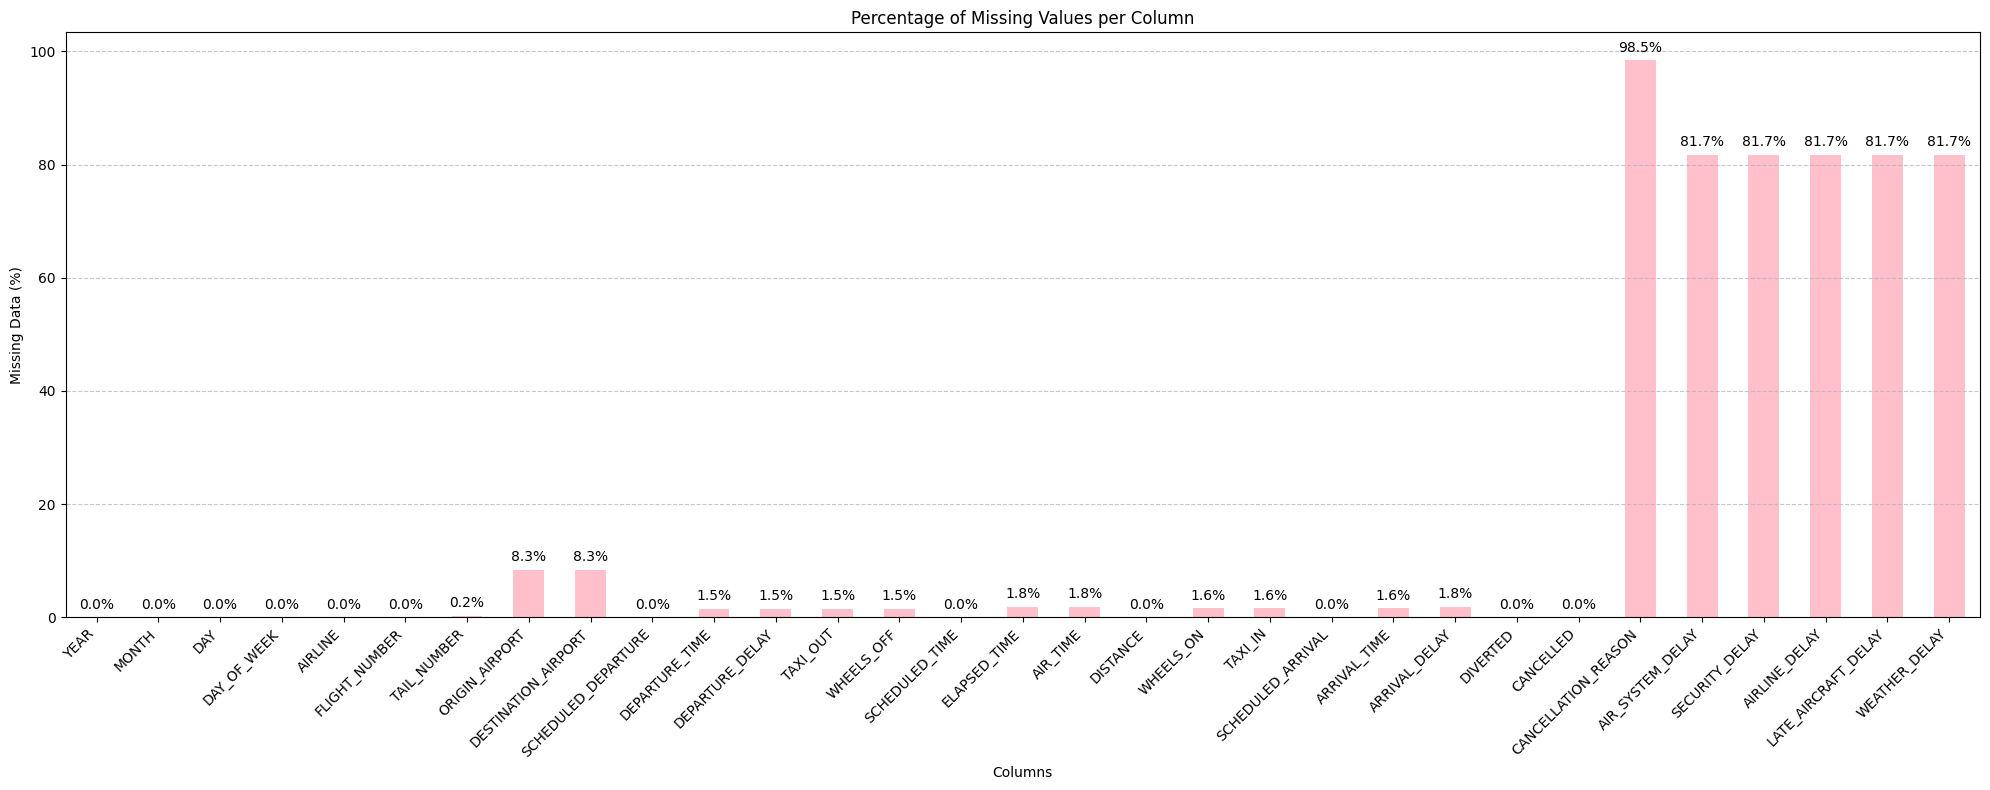

In [6]:
# Calculate missing values and their percentages
null_counts = df.isnull().sum()
missing_percentage = (null_counts / len(df) * 100).round(2)

# Create a DataFrame to store the results
missing_data = pd.DataFrame({
    'Missing Values': null_counts,
    '% Missing': missing_percentage
})

# Filter only the columns with missing values
missing_data = missing_data[missing_data['Missing Values'] > 0]

# Print the missing data summary in text format
print("Missing Data Summary:\n")
for col, row in missing_data.iterrows():
    print(f"{col}: {row['Missing Values']} missing ({row['% Missing']}%)")

# Create the plot
plt.figure(figsize=(20, 8))
missing_percentage.plot(kind='bar', color='pink')
plt.title('Percentage of Missing Values per Column', color='black')
plt.xlabel('Columns', color='black')
plt.ylabel('Missing Data (%)', color='black')
plt.xticks(rotation=45, ha='right', color='black')  # Rotate x-axis labels for better readability
plt.yticks(color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on top of each bar
for i, v in enumerate(missing_percentage):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


📌Observations:

* Key Metrics with Low Missing Values:
Columns such as TAIL_NUMBER, DEPARTURE_TIME, DEPARTURE_DELAY, and ARRIVAL_DELAY have missing values under 2%, indicating minimal data gaps.
Moderate Missing Rates in Airports:

* ORIGIN_AIRPORT and DESTINATION_AIRPORT have 8.35% missing values, suggesting possible issues with mapping or dataset completeness.
Significant Missing Values in Cancellation Reasons:

* CANCELLATION_REASON has 98.46% missing data, likely because cancellations are rare. This column might need simplification into binary "Canceled" information.
Delay-Type Columns with High Missing Rates:

* Columns like AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, and WEATHER_DELAY are over 80% missing, which suggests these delays may not apply to most flights.
Time-Based Metrics with Some Missingness:

* Columns such as WHEELS_OFF, TAXI_OUT, AIR_TIME, and ELAPSED_TIME have missing values ranging from 1.5% to 1.8%, which could correlate with canceled or diverted flights.

In [7]:
# Keep missing TAIL_NUMBER values
df['TAIL_NUMBER'] = df['TAIL_NUMBER'].fillna('Unknown')

# Drop rows with missing airport codes
df = df.dropna(subset=['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])
# Fill missing delay types with 0
delay_columns = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
                 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df[delay_columns] = df[delay_columns].fillna(0)
# Fill missing cancellation reasons
df['CANCELLATION_REASON'] = df['CANCELLATION_REASON'].fillna('Not Cancelled')
# Drop rows with missing core metrics
core_columns = ['DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
                'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
                'ARRIVAL_TIME', 'ARRIVAL_DELAY']
df = df.dropna(subset=core_columns)
# Impute missing SCHEDULED_TIME with median
df['SCHEDULED_TIME'] = df['SCHEDULED_TIME'].fillna(df['SCHEDULED_TIME'].median())
# Drop rows with missing ELAPSED_TIME and AIR_TIME
df = df.dropna(subset=['ELAPSED_TIME', 'AIR_TIME'])
# Check remaining missing values
print("Missing Values After Cleaning:")
print(df.isnull().sum())

Missing Values After Cleaning:
YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64


STEP 3: DEAL WITH OUTLIERS

* Time columns aren’t typically checked for outliers in the same way as numerical values, since time is cyclical. Time operates on a 24-hour cycle, meaning that values like 23:59 and 00:01 are only two minutes apart, but a naive statistical approach might misinterpret them as being far apart. This cyclic property makes traditional outlier detection methods, like the Interquartile Range (IQR), unsuitable.


Statistics for Numerical Columns:
DEPARTURE_DELAY: 652543 outliers (12.47% of data)
Lower Bound: -24.50, Upper Bound: 27.50
----------------------------------------
TAXI_OUT: 262680 outliers (5.02% of data)
Lower Bound: -1.00, Upper Bound: 31.00
----------------------------------------
SCHEDULED_TIME: 268218 outliers (5.13% of data)
Lower Bound: -46.00, Upper Bound: 306.00
----------------------------------------
ELAPSED_TIME: 259171 outliers (4.95% of data)
Lower Bound: -48.50, Upper Bound: 299.50
----------------------------------------
AIR_TIME: 271592 outliers (5.19% of data)
Lower Bound: -66.00, Upper Bound: 270.00
----------------------------------------
DISTANCE: 315051 outliers (6.02% of data)
Lower Bound: -666.50, Upper Bound: 2105.50
----------------------------------------
TAXI_IN: 258581 outliers (4.94% of data)
Lower Bound: -3.50, Upper Bound: 16.50
----------------------------------------
ARRIVAL_DELAY: 485923 outliers (9.29% of data)
Lower Bound: -44.50, Upper Bound: 39

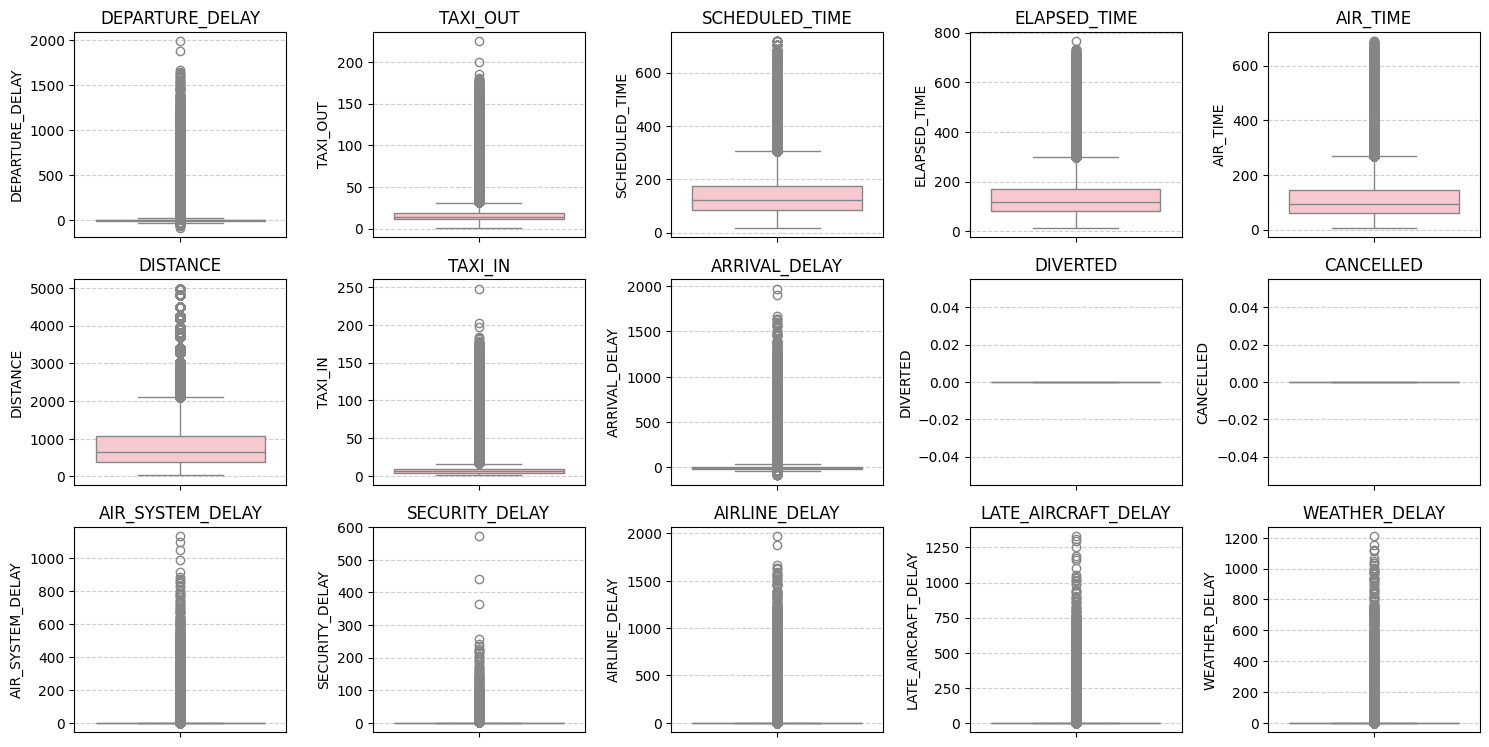

In [8]:
# Relevant columns to check for outlier detection (excluding time columns)
columns_to_check = ['DEPARTURE_DELAY', 'TAXI_OUT',
                    'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
                    'TAXI_IN', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
                    'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Detect outliers and print stats
print("\nStatistics for Numerical Columns:")
for col in columns_to_check:
    outliers, lower_bound, upper_bound = detect_outliers(df, col)
    outlier_percentage = (outliers / df.shape[0]) * 100
    print(f"{col}: {outliers} outliers ({outlier_percentage:.2f}% of data)")

    # Check if the bounds are Timedelta objects before formatting
    if isinstance(lower_bound, pd.Timedelta):
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    else:
        print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")

    print("-" * 40)

# Create boxplots with pink color and black text
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(4, 5, i)  # Adjust layout as needed
    sns.boxplot(y=df[col], color='pink')  # Set boxplot color to pink
    plt.title(col, fontsize=12, color='black')  # Black text for the title
    plt.ylabel(col, fontsize=10, color='black')  # Black text for y-axis label
    plt.xticks(color='black')  # Black text for x-axis ticks
    plt.yticks(color='black')  # Black text for y-axis ticks
    plt.grid(axis='y', linestyle='--', alpha=0.6)  # Optional gridlines
plt.tight_layout()
plt.show()

Observations from Outlier Analysis:
1. Delays (Departure & Arrival):
* DEPARTURE_DELAY has the highest percentage of outliers at 12.47%, with extreme delays beyond ±27.5 minutes.
* ARRIVAL_DELAY also shows 9.29% outliers, indicating a significant portion of flights facing extreme early arrivals or delays.

2. Taxi Times:
* TAXI_OUT has 5.02% outliers, with extreme values over 31 minutes, hinting at congestion on runways.
* TAXI_IN has 4.94% outliers, with the upper limit at 16.5 minutes, likely caused by gate availability or ground traffic delays.

3. Flight Times (Scheduled, Elapsed, and Air Time):
* SCHEDULED_TIME, ELAPSED_TIME, and AIR_TIME show around 5% outliers, with extreme durations. This may relate to unexpected rerouting, long-haul flights, or operational inefficiencies.

4. Delays by Source:
* AIR_SYSTEM_DELAY, AIRLINE_DELAY, and LATE_AIRCRAFT_DELAY each have ~10% outliers, implying systemic inefficiencies are prominent contributors to delays.
* SECURITY_DELAY and WEATHER_DELAY have relatively fewer outliers (0.06% and 1.20%) but remain critical for unpredictable disruptions.
Distance:

5. 6.02% outliers exist for DISTANCE, with extreme values extending over 2105.5 miles, possibly representing long-haul international routes.

Key Takeaways:
The high proportion of outliers in DEPARTURE_DELAY, ARRIVAL_DELAY, and AIRLINE_DELAY emphasizes frequent operational delays, requiring deeper investigation.
Significant variability in TAXI_OUT and TAXI_IN times highlights potential congestion or inefficiencies in ground handling.
Understanding extreme cases in DISTANCE and time metrics (ELAPSED_TIME, etc.) can help identify outlier routes or problematic scenarios.

In [9]:
# Cap extreme DEPARTURE_DELAY values
threshold_departure = df['DEPARTURE_DELAY'].quantile(0.95)
df['DEPARTURE_DELAY'] = df['DEPARTURE_DELAY'].apply(lambda x: min(x, threshold_departure))
# Cap extreme ARRIVAL_DELAY values
threshold_arrival = df['ARRIVAL_DELAY'].quantile(0.95)
df['ARRIVAL_DELAY'] = df['ARRIVAL_DELAY'].apply(lambda x: min(x, threshold_arrival))
# Cap extreme TAXI_OUT values
threshold_taxi_out = df['TAXI_OUT'].quantile(0.95)
df['TAXI_OUT'] = df['TAXI_OUT'].apply(lambda x: min(x, threshold_taxi_out))
# Cap extreme TAXI_IN values
threshold_taxi_in = df['TAXI_IN'].quantile(0.95)
df['TAXI_IN'] = df['TAXI_IN'].apply(lambda x: min(x, threshold_taxi_in))
# Cap extreme ELAPSED_TIME values
threshold_elapsed = df['ELAPSED_TIME'].quantile(0.95)
df['ELAPSED_TIME'] = df['ELAPSED_TIME'].apply(lambda x: min(x, threshold_elapsed))
# Cap extreme AIR_TIME values
threshold_air_time = df['AIR_TIME'].quantile(0.95)
df['AIR_TIME'] = df['AIR_TIME'].apply(lambda x: min(x, threshold_air_time))
# Summary statistics after handling outliers
print("Summary After Outlier Handling:")
print(df[['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ELAPSED_TIME', 'AIR_TIME']].describe())

Summary After Outlier Handling:
       DEPARTURE_DELAY  ARRIVAL_DELAY      TAXI_OUT       TAXI_IN  \
count     5.231130e+06   5.231130e+06  5.231130e+06  5.231130e+06   
mean      6.347684e+00   1.544087e+00  1.549977e+01  6.965341e+00   
std       1.993852e+01   2.353267e+01  6.528154e+00  3.585544e+00   
min      -8.200000e+01  -8.700000e+01  1.000000e+00  1.000000e+00   
25%      -5.000000e+00  -1.300000e+01  1.100000e+01  4.000000e+00   
50%      -1.000000e+00  -5.000000e+00  1.400000e+01  6.000000e+00   
75%       8.000000e+00   8.000000e+00  1.900000e+01  9.000000e+00   
max       6.800000e+01   6.800000e+01  3.200000e+01  1.600000e+01   

       ELAPSED_TIME      AIR_TIME  
count  5.231130e+06  5.231130e+06  
mean   1.349477e+02  1.115341e+02  
std    6.781456e+01  6.611532e+01  
min    1.400000e+01  7.000000e+00  
25%    8.200000e+01  6.000000e+01  
50%    1.190000e+02  9.400000e+01  
75%    1.690000e+02  1.440000e+02  
max    2.990000e+02  2.730000e+02  


### Observations After Outlier Handling:
The outlier capping has successfully resulted in a **cleaner dataset** with more manageable and realistic ranges for key metrics. Below are the key takeaways:

1. **Departure and Arrival Delays**:
   - Maximum delays have been capped at **68 minutes**, bringing the dataset closer to **operational norms**.
   - Negative values, indicating **early departures or arrivals**, are valid scenarios in aviation and remain intact for analysis.

2. **Taxi Times (Out and In)**:
   - **`TAXI_OUT`** is capped at **32 minutes**, a feasible upper limit, especially for operations at busier airports.
   - **`TAXI_IN`** is capped at **16 minutes**, reflecting a controlled range for post-landing operations.

3. **Elapsed Time and Air Time**:
   - Maximum values of **299 minutes** for `ELAPSED_TIME` and **273 minutes** for `AIR_TIME` align with typical flight durations, especially for **domestic routes**.

4. **Robustness of the Dataset**:
   - By excluding extreme anomalies while preserving variability, the dataset is now well-suited for accurate analysis of metrics like **OTAR** (On-Time Arrival Rate) and other key aviation KPIs.

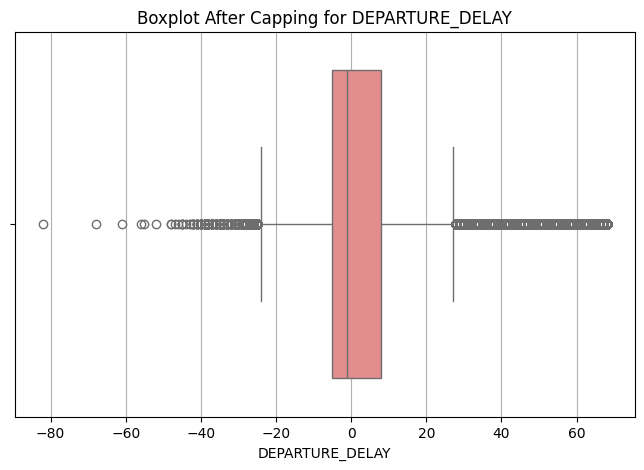

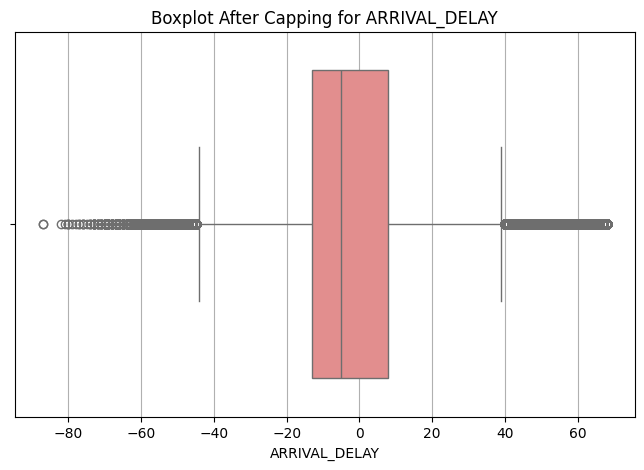

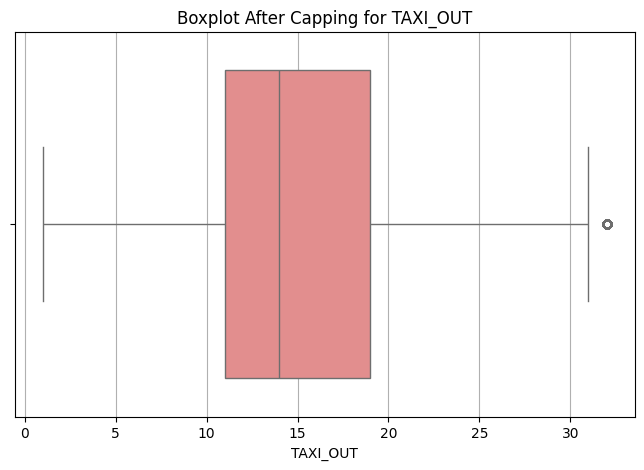

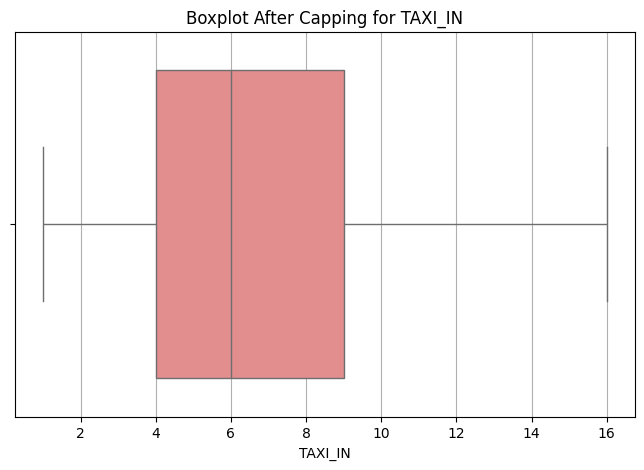

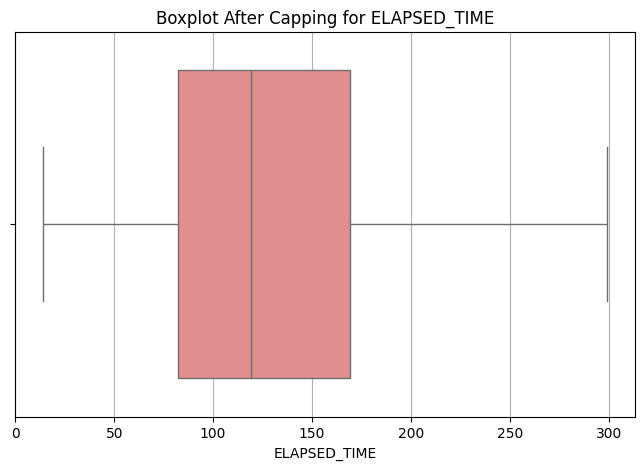

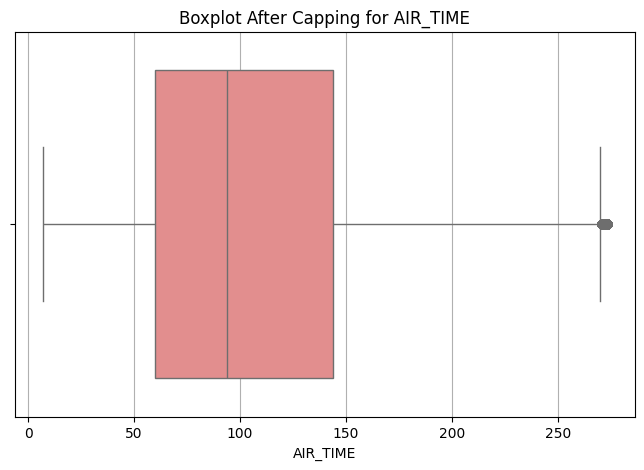

In [ ]:
# Visualize changes post-capping for capped columns
capped_columns = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ELAPSED_TIME', 'AIR_TIME']

for col in capped_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot After Capping for {col}')
    plt.xlabel(col)
    plt.grid(axis='x')
    plt.show()

With the dataset now cleaned and processed, we proceed to `Feature Engineering—the process of transforming raw data into meaningful and informative features that enhance the quality and effectiveness of analysis.` In the context of this project, feature engineering enables us to derive deeper insights into the factors influencing On-Time Arrival Rate (OTAR) by creating relevant groupings, flags, and derived metrics that capture operational nuances more accurately.

`STEP 1`: To enable accurate time-based analysis, we begin by converting the following columns: SCHEDULED_DEPARTURE, SCHEDULED_ARRIVAL, WHEELS_OFF, WHEELS_ON, and ARRIVAL_TIME into a standardized 24-hour time format. This transformation is essential for ensuring consistency in time-based calculations, facilitating the creation of derived features such as time-of-day bins (morning, afternoon, evening, night) and supporting chronological analyses such as identifying peak delay hours, airport congestion periods, and other temporal patterns affecting On-Time Arrival Rate (OTAR). This step ensures that time values are in a **machine-readable and logical format**.
In aviation, time is often recorded using the 24-hour clock system, also referred to as **military time**.
1. `24:00` & `00:00` both represent the **same point in time**, the **start of a new day (midnight)**.
2. **Consistency in Scheduling**: Airlines and airports commonly use `00:00` for clarity and to avoid ambiguity when referring to flights scheduled at the stroke of midnight.
3. **Data Integrity**: Converting `24:00` to `00:00` ensures consistency across datasets. Without this, analytics or visualizations may treat `24:00` as a different entity, creating discrepancies.
4. **Operational Planning**: In aviation, precision is vital. Treating `24:00` as `00:00` simplifies processes like **calculating durations** or **estimating delays**, aligning time data with how it’s naturally understood in operations.

In [10]:
# Columns requiring time conversion
columns_to_convert = ['SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE', 'WHEELS_OFF',
                      'DEPARTURE_TIME', 'WHEELS_ON', 'ARRIVAL_TIME']

# Function to convert integers to proper 24-hour time format
def convert_to_time(val):
    try:
        val = int(val)
        if val == 24:  # Special case for 24 to be treated as 00:00
            return '00:00:00'
        elif val < 10:  # Single-digit case (e.g., 5 -> 00:05:00)
            return f'00:0{val}:00'
        elif val < 100:  # Double-digit minutes (e.g., 10 -> 00:10:00)
            return f'00:{val}:00'
        else:  # General case for time in HHMM format
            hours = val // 100
            minutes = val % 100
            return f'{hours:02}:{minutes:02}:00'
    except:
        return None  # Handles invalid or missing values gracefully

# Apply conversion to all specified columns
for column in columns_to_convert:
    if column in df.columns:
        df[column] = df[column].apply(convert_to_time)

# Convert strings to datetime.time objects for time datatype usage
for column in columns_to_convert:
    if column in df.columns:
        df[column] = pd.to_datetime(df[column], format='%H:%M:%S', errors='coerce').dt.time

**STEP 2:** Converting Scheduled Time, Elapsed Time and Air Time into hours.

In [11]:
## Convert only to hours
df['SCHEDULED_TIME'] = df['SCHEDULED_TIME'] / 60
df['ELAPSED_TIME'] = df['ELAPSED_TIME'] / 60
df['AIR_TIME'] = df['AIR_TIME'] / 60

**STEP 3:** OTAR CALCULATION

**OTAR:** The On-Time Arrival Rate measures how frequently flights arrive on or before their scheduled arrival time.


OTAR
1    62.806392
0    37.193608
Name: proportion, dtype: float64


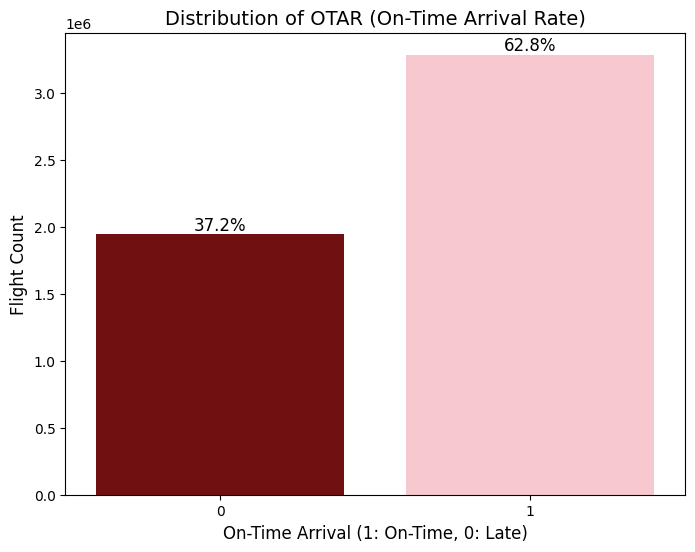

In [12]:
# Create a new column 'OTAR' (On-Time Arrival Rate)
# If ARRIVAL_DELAY is 0 or negative (i.e., arrived on time or early), set OTAR = 1
# If ARRIVAL_DELAY is positive (i.e., arrived late), set OTAR = 0
# Convert 'ARRIVAL_DELAY' to numeric minutes for comparison
df['OTAR'] = np.where(pd.to_numeric(df['ARRIVAL_DELAY']) <= 0, 1, 0)

# Calculate the percentage distribution of OTAR values
# 'value_counts(normalize=True)' returns the proportion of each value (1 or 0)
# Multiplying by 100 converts the proportions to percentages
otar_percentage = df['OTAR'].value_counts(normalize=True) * 100

# Print the result: percentage of on-time (1) and delayed (0) arrivals
print(otar_percentage)

# Custom color palette: 0 → maroon, 1 → pink
custom_palette = {'0': "#800000", '1': "#ffc0cb"} # Changed keys to strings

# Create the plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='OTAR', data=df, palette=custom_palette)

# Annotate percentages on the bars
total = len(df)
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total:.1f}%"
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

# Add labels and title
plt.title('Distribution of OTAR (On-Time Arrival Rate)', fontsize=14)
plt.xlabel('On-Time Arrival (1: On-Time, 0: Late)', fontsize=12)
plt.ylabel('Flight Count', fontsize=12)
plt.show()

`Insight`:
The chart shows a strong majority of flights `62.8%` are on-time, while `37.2%`experience delays.


`Hypothesis Testing`: Hypothesis testing is a statistical method used to determine whether there is enough evidence in a dataset to support a specific assumption (hypothesis) about a key metric or relationship.

H1: Departure Delays Cascade into Arrival Delays:

Correlation Between Departure and Arrival Delays:
                 DEPARTURE_DELAY  ARRIVAL_DELAY
DEPARTURE_DELAY         1.000000       0.861965
ARRIVAL_DELAY           0.861965       1.000000
Low Departure Delay Group Statistics:
count    4.240765e+06
mean    -6.905224e+00
std      1.307023e+01
min     -8.700000e+01
25%     -1.500000e+01
50%     -8.000000e+00
75%      0.000000e+00
max      6.800000e+01
Name: ARRIVAL_DELAY, dtype: float64

High Departure Delay Group Statistics:
count    990365.000000
mean         37.724228
std          24.060572
min         -60.000000
25%          17.000000
50%          35.000000
75%          68.000000
max          68.000000
Name: ARRIVAL_DELAY, dtype: float64
T-Test Results:
t-statistic: -1785.4263230746087
p-value: 0.0


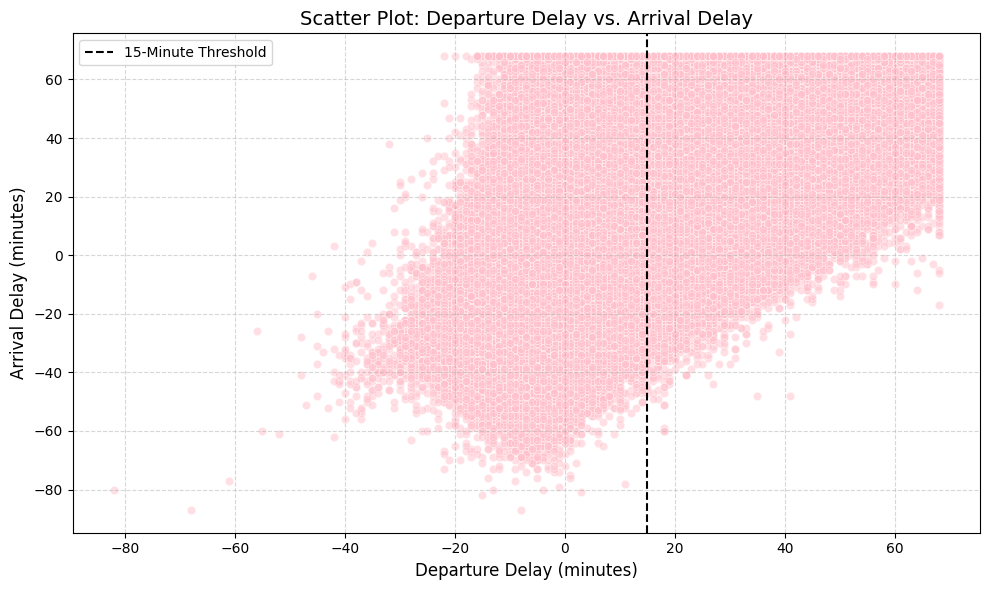

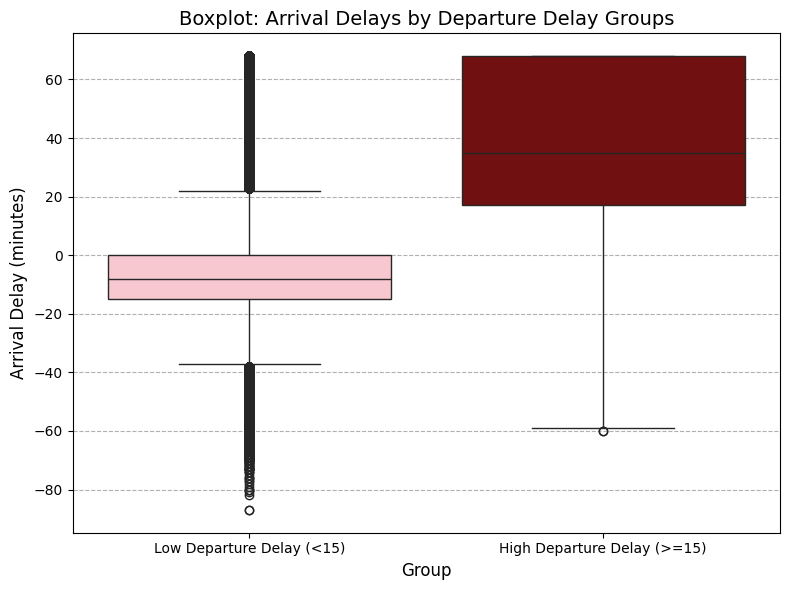

In [13]:
from scipy.stats import ttest_ind

# Step 1: Reconfirm Pearson's Correlation
correlation = df[['DEPARTURE_DELAY', 'ARRIVAL_DELAY']].corr(method='pearson')
print("Correlation Between Departure and Arrival Delays:")
print(correlation)

# Step 2: Prepare Data for t-Test
# Divide data into two groups based on departure delay threshold
low_departure_delay = df[df['DEPARTURE_DELAY'] < 15]['ARRIVAL_DELAY']
high_departure_delay = df[df['DEPARTURE_DELAY'] >= 15]['ARRIVAL_DELAY']

# Check basic statistics for the two groups
print("Low Departure Delay Group Statistics:")
print(low_departure_delay.describe())

print("\nHigh Departure Delay Group Statistics:")
print(high_departure_delay.describe())

# Step 3: Conduct Two-Sample t-Test
# Perform t-test
t_stat, p_value = ttest_ind(low_departure_delay.dropna(), high_departure_delay.dropna(), equal_var=False)

# Display t-test results
print("T-Test Results:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Step 4: Visualize the Relationship
# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DEPARTURE_DELAY', y='ARRIVAL_DELAY', data=df, alpha=0.5, color='#ffc0cb')  # Pink scatter points
plt.axvline(x=15, color='black', linestyle='--', label='15-Minute Threshold')  # Threshold marker
plt.title('Scatter Plot: Departure Delay vs. Arrival Delay', fontsize=14, color='black')
plt.xlabel('Departure Delay (minutes)', fontsize=12, color='black')
plt.ylabel('Arrival Delay (minutes)', fontsize=12, color='black')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Boxplot for Group Comparison
# Combine the two groups into one dataframe for boxplot
boxplot_data = pd.DataFrame({
    'Group': ['Low Departure Delay (<15)'] * len(low_departure_delay) + ['High Departure Delay (>=15)'] * len(high_departure_delay),
    'Arrival Delay': pd.concat([low_departure_delay, high_departure_delay], axis=0)
})

# Boxplot to compare the two groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Arrival Delay', data=boxplot_data, palette=['#ffc0cb', '#800000'])
plt.title('Boxplot: Arrival Delays by Departure Delay Groups', fontsize=14, color='black')
plt.xlabel('Group', fontsize=12, color='black')
plt.ylabel('Arrival Delay (minutes)', fontsize=12, color='black')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

H2: Winter months have higher weather-related delays compared to summer months.


Seasonal Weather-Related Delay and OTAR Performance:
   SEASON  WEATHER_DELAY      OTAR
0   Other       0.465636  0.656263
1  Summer       0.581635  0.611169
2  Winter       0.750341  0.596785

T-Test Results: Winter vs Summer Weather-Related Delays
t-statistic: 14.319670435307135, p-value: 1.6561079757049508e-46


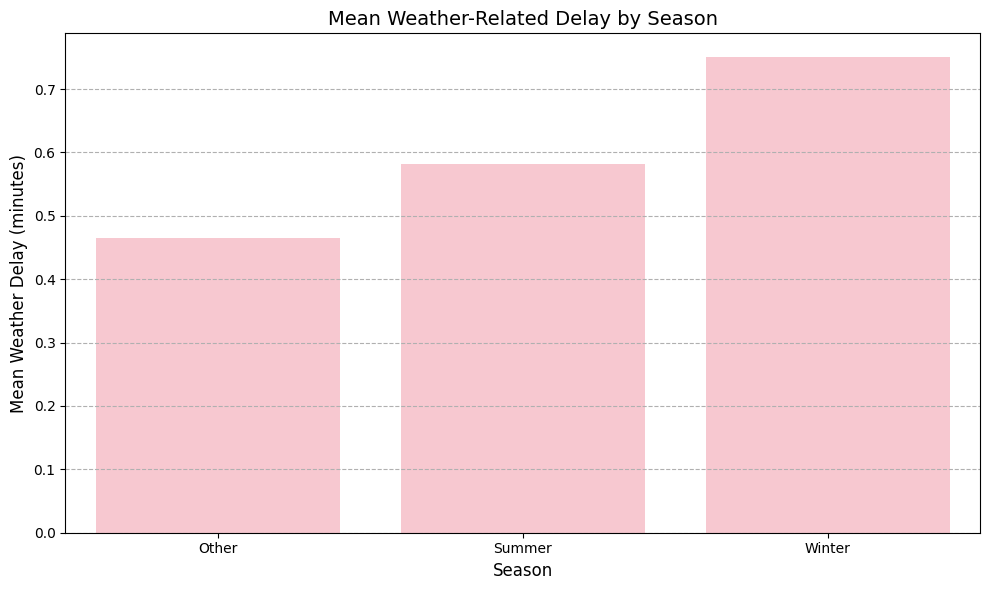

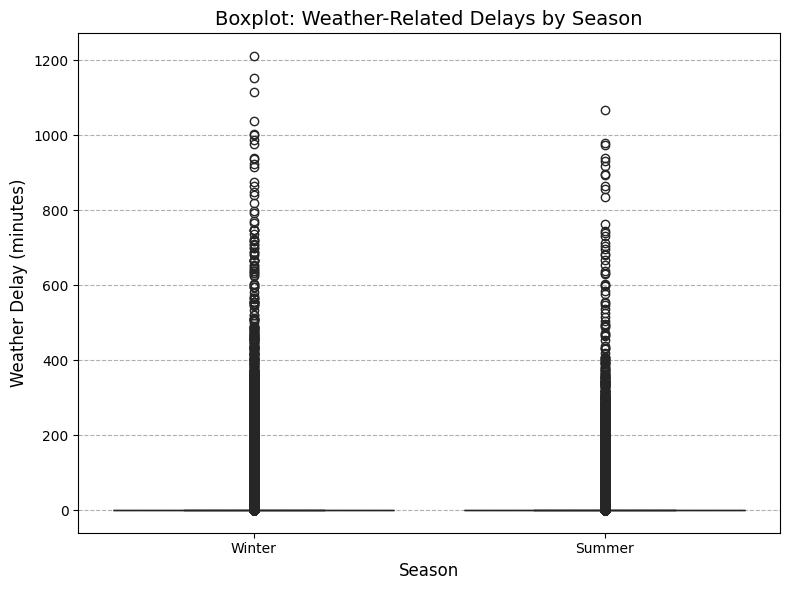

In [14]:
from scipy.stats import ttest_ind

# Step 1: Group Data by Seasons
df['SEASON'] = df['MONTH'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Summer' if x in [6, 7, 8] else 'Other'))
seasonal_delays = df.groupby('SEASON')[['WEATHER_DELAY', 'OTAR']].mean().reset_index()
print("Seasonal Weather-Related Delay and OTAR Performance:")
print(seasonal_delays)

# Step 2: Conduct Two-Sample t-Test
# Extract winter and summer weather delays
winter_weather_delay = df[df['SEASON'] == 'Winter']['WEATHER_DELAY']
summer_weather_delay = df[df['SEASON'] == 'Summer']['WEATHER_DELAY']

# Perform t-test
t_stat_season, p_value_season = ttest_ind(winter_weather_delay.dropna(), summer_weather_delay.dropna(), equal_var=False)

# Display t-test results
print("\nT-Test Results: Winter vs Summer Weather-Related Delays")
print(f"t-statistic: {t_stat_season}, p-value: {p_value_season}")

# Step 3: Visualizations

# Bar Plot: Mean Weather Delay by Season
plt.figure(figsize=(10, 6))
sns.barplot(x='SEASON', y='WEATHER_DELAY', data=seasonal_delays, color='#ffc0cb')  # Pink bars
plt.title('Mean Weather-Related Delay by Season', fontsize=14, color='black')
plt.xlabel('Season', fontsize=12, color='black')
plt.ylabel('Mean Weather Delay (minutes)', fontsize=12, color='black')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Boxplot: Weather Delays by Season
boxplot_data_season = pd.DataFrame({
    'Season': ['Winter'] * len(winter_weather_delay) + ['Summer'] * len(summer_weather_delay),
    'Weather Delay': pd.concat([winter_weather_delay, summer_weather_delay], axis=0)
})

plt.figure(figsize=(8, 6))
sns.boxplot(x='Season', y='Weather Delay', data=boxplot_data_season, palette=['#ffc0cb', '#800000'])
plt.title('Boxplot: Weather-Related Delays by Season', fontsize=14, color='black')
plt.xlabel('Season', fontsize=12, color='black')
plt.ylabel('Weather Delay (minutes)', fontsize=12, color='black')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

H3: Aircraft Turnaround Time and Late Aircraft Delays Affect Efficiency:
Metrics like TAXI_IN, TAXI_OUT, and LATE_AIRCRAFT_DELAY are available in the dataset and directly relate to operational turnaround efficiency. This hypothesis is well-suited for testing.


In [15]:
from scipy.stats import ttest_ind

# Step 1: Analyze Correlations
turnaround_corr = df[['TAXI_IN', 'TAXI_OUT', 'LATE_AIRCRAFT_DELAY', 'OTAR']].corr()
print("Correlation Between Turnaround Metrics and OTAR:")
print(turnaround_corr)

# Step 2: Group Analysis Based on Turnaround Time Threshold
# Define threshold (e.g., TAXI_IN + TAXI_OUT > 20 minutes as long turnaround)
df['TOTAL_TURNAROUND'] = df['TAXI_IN'] + df['TAXI_OUT']
short_turnaround = df[df['TOTAL_TURNAROUND'] <= 20]['OTAR']
long_turnaround = df[df['TOTAL_TURNAROUND'] > 20]['OTAR']

# Compare basic statistics
print("Short Turnaround Group Statistics:")
print(short_turnaround.describe())

print("\nLong Turnaround Group Statistics:")
print(long_turnaround.describe())

# Step 3: Conduct t-Test for Turnaround Time Groups
t_stat_turnaround, p_value_turnaround = ttest_ind(short_turnaround.dropna(), long_turnaround.dropna(), equal_var=False)
print("\nT-Test Results: Short vs Long Turnaround OTAR")
print(f"t-statistic: {t_stat_turnaround}, p-value: {p_value_turnaround}")


Correlation Between Turnaround Metrics and OTAR:
                      TAXI_IN  TAXI_OUT  LATE_AIRCRAFT_DELAY      OTAR
TAXI_IN              1.000000  0.003655             0.009030 -0.112696
TAXI_OUT             0.003655  1.000000             0.019883 -0.270952
LATE_AIRCRAFT_DELAY  0.009030  0.019883             1.000000 -0.279243
OTAR                -0.112696 -0.270952            -0.279243  1.000000
Short Turnaround Group Statistics:
count    2.424264e+06
mean     7.272710e-01
std      4.453627e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: OTAR, dtype: float64

Long Turnaround Group Statistics:
count    2.806866e+06
mean     5.423797e-01
std      4.982008e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: OTAR, dtype: float64

T-Test Results: Short vs Long Turnaround OTAR
t-statistic: 448.1043461792806, p-value: 0.0


**H4:** OTAR by Day of Week

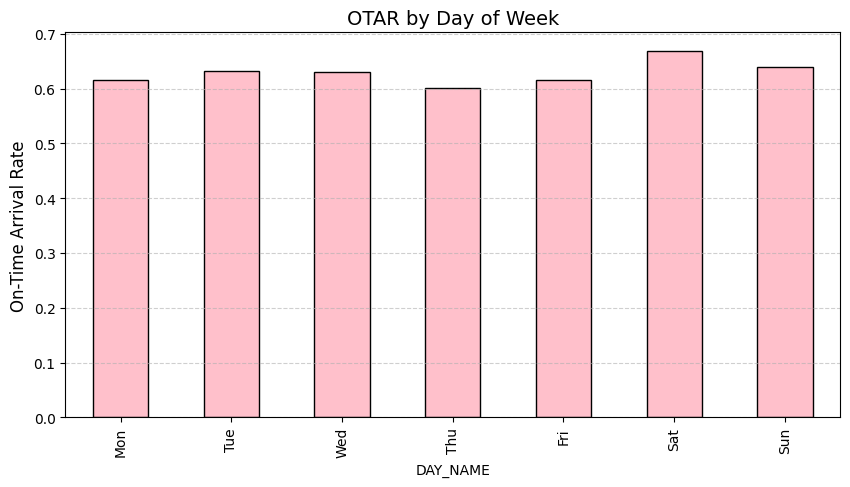

Insight: On-Time Arrival Rate tends to be slightly better on weekends (Saturday and Sunday).


In [22]:
# Mapping day names
day_map = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}
df['DAY_NAME'] = df['DAY_OF_WEEK'].map(day_map)

# Group by day and calculate mean OTAR
day_otar = df.groupby('DAY_NAME')['OTAR'].mean().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Plot with pink color
plt.figure(figsize=(10, 5))
day_otar.plot(kind='bar', color='pink', edgecolor='black')
plt.title('OTAR by Day of Week', fontsize=14, color='black')
plt.ylabel('On-Time Arrival Rate', fontsize=12, color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Optional grid for better readability
plt.show()
print("Insight: On-Time Arrival Rate tends to be slightly better on weekends (Saturday and Sunday).")


`Exploratory Data Analysis`: **EDA** is a critical step in understanding the structure, quality, and underlying patterns within the dataset. In the context of this project, EDA helps identify the key operational and delay-related variables that influence On-Time Arrival Rate (OTAR). It involves summarizing distributions, detecting anomalies, visualizing trends, and uncovering relationships between variables such as departure delays, taxi times, flight schedules, and weather disruptions. These insights serve as the foundation for hypothesis testing and strategic recommendations aimed at improving IndiGo’s punctuality performance in the U.S. domestic aviation market.

In [23]:
print("Dataset Overview:")
print(data.info())  # Check column data types and missing values

print("\nSummary Statistics:")
print(data.describe())  # Get basic statistics for numerical columns


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED      

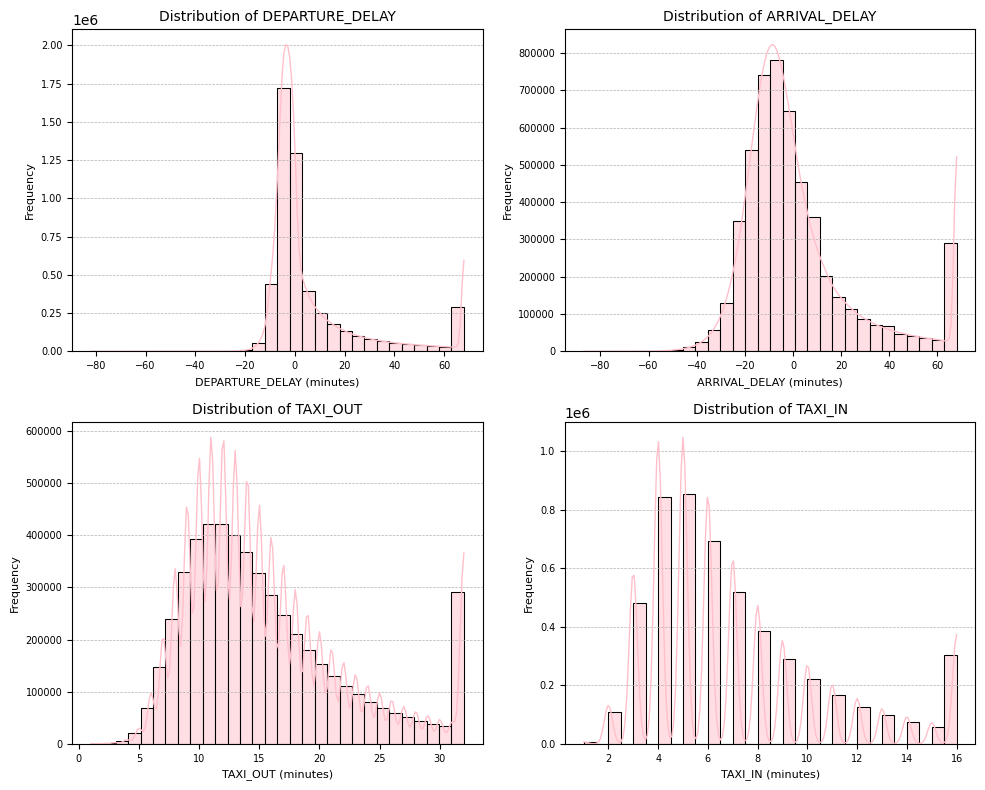

In [24]:
# Plot histograms for key delay metrics
delay_cols = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TAXI_OUT', 'TAXI_IN']

# Use shared figure size and settings to minimize creation overhead
plt.figure(figsize=(10, 8))  # Reuse a single figure size

for i, col in enumerate(delay_cols, start=1):
    # Create subplots instead of generating individual plots
    plt.subplot(2, 2, i)  # Arrange plots in a grid (2x2)
    sns.histplot(df[col], bins=30, kde=True,  # Fewer bins for faster plotting
                 color='#ffc0cb',  # Pink bars
                 line_kws={'color': '#800000', 'linewidth': 1})  # Reduce KDE line width
    plt.title(f'Distribution of {col}', fontsize=10, color='black')  # Smaller fonts
    plt.xlabel(f'{col} (minutes)', fontsize=8, color='black')  # Optimize label sizes
    plt.ylabel('Frequency', fontsize=8, color='black')
    plt.xticks(fontsize=7, color='black')  # Optimize tick sizes
    plt.yticks(fontsize=7, color='black')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)  # Lighter grid lines

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

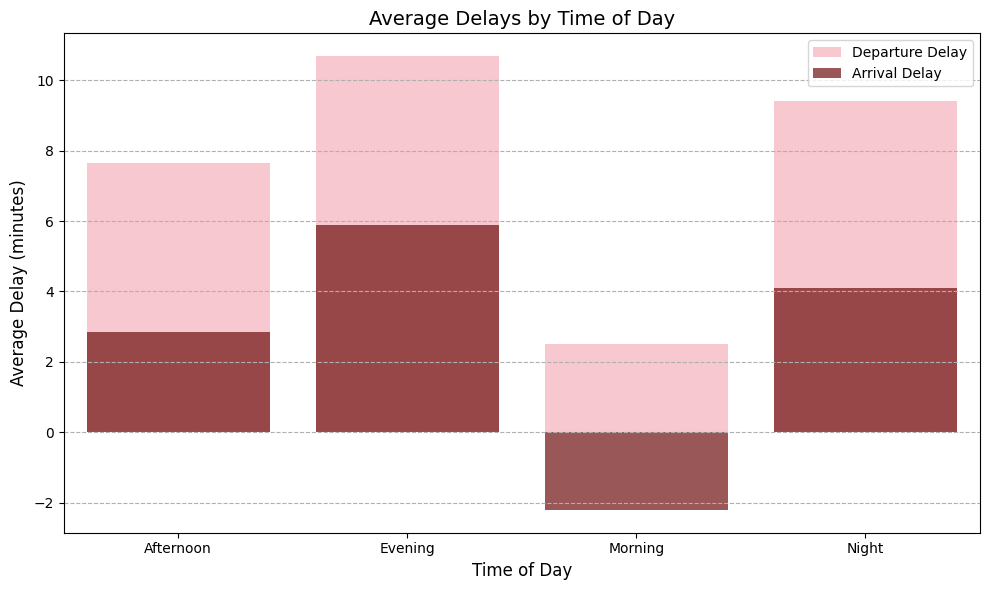

In [25]:
# Define a function to categorize departure times into time-of-day bins
def time_of_day(time_obj):
    # Extract hour from the datetime.time object
    hour = time_obj.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Create time-of-day bins based on SCHEDULED_DEPARTURE
df['DEPARTURE_BIN'] = df['SCHEDULED_DEPARTURE'].apply(time_of_day)

# Group by time-of-day bins and calculate mean delay
time_of_day_delays = df.groupby('DEPARTURE_BIN')[['DEPARTURE_DELAY', 'ARRIVAL_DELAY']].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='DEPARTURE_BIN', y='DEPARTURE_DELAY', data=time_of_day_delays, color='#ffc0cb', label='Departure Delay')
sns.barplot(x='DEPARTURE_BIN', y='ARRIVAL_DELAY', data=time_of_day_delays, color='#800000', alpha=0.7, label='Arrival Delay')

plt.title('Average Delays by Time of Day', fontsize=14, color='black')
plt.xlabel('Time of Day', fontsize=12, color='black')
plt.ylabel('Average Delay (minutes)', fontsize=12, color='black')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.xticks(color='black')
plt.yticks(color='black')
plt.tight_layout()
plt.show()

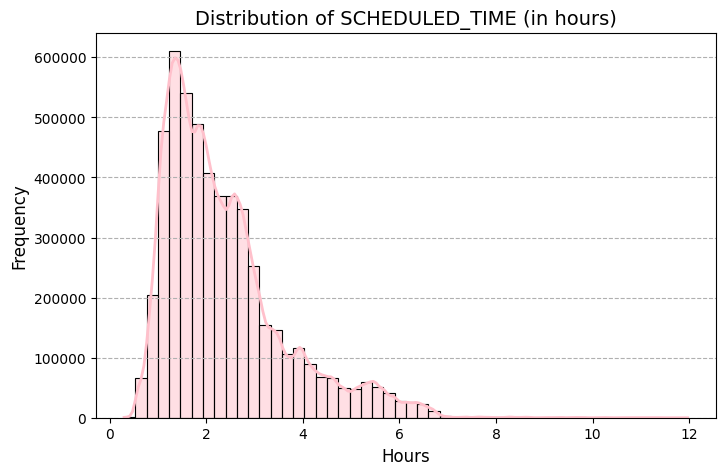

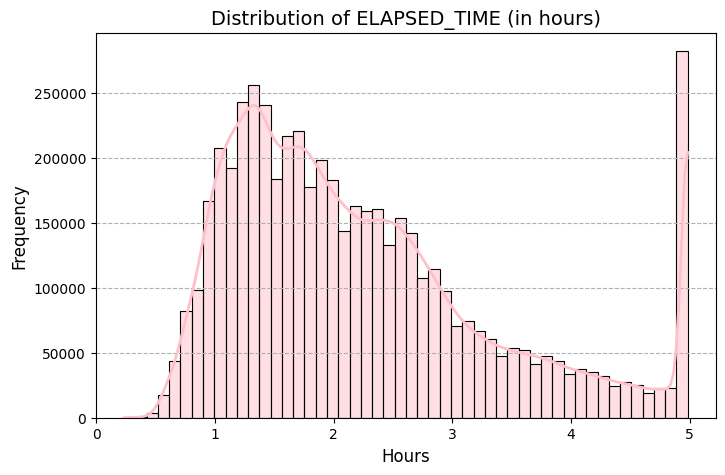

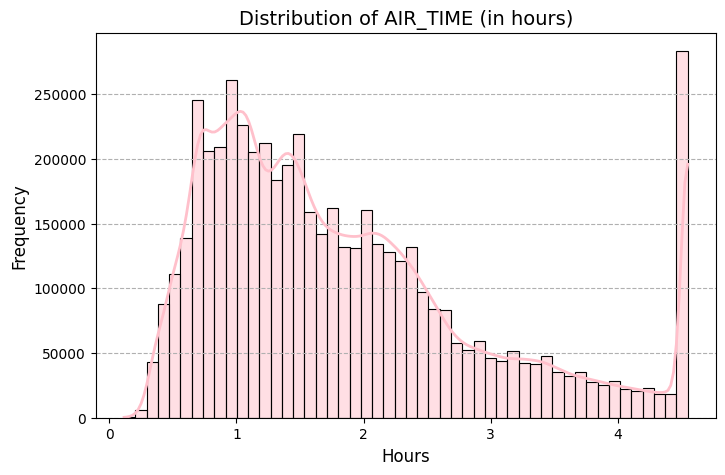

In [26]:
### Plot histograms to visualize distributions
duration_cols = ['SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME']

for col in duration_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=50, kde=True,
                 color='#ffc0cb',  # Pink bars
                 line_kws={'color': '#800000', 'linewidth': 2})  # Maroon KDE
    plt.title(f'Distribution of {col} (in hours)', fontsize=14)
    plt.xlabel('Hours', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--')
    plt.show()

#### **Insights from Outputs**:
1. **SCHEDULED_TIME**: Flights are predominantly scheduled within 1 to 3 hours, with a peak near **1 hour**. This suggests most routes fall within short- to medium-haul durations. Long-haul flights are less frequent, as indicated by the tapering tail beyond **4 hours**.

2. **ELAPSED_TIME**: The pattern mirrors **SCHEDULED_TIME**, peaking around **2 hours** but with more spread. This distribution reflects operational variances like taxi times and ground delays impacting total elapsed time. A noticeable spike near **5 hours** could indicate longer flight durations or routes with added delays.

3. **AIR_TIME**: This metric has a narrower range compared to **ELAPSED_TIME**, with most flights concentrated around **1.5 hours**. The reduction in tail length compared to **ELAPSED_TIME** is expected, as it excludes ground operations like taxiing.

#### **Overall Observations**:
- The distributions confirm a predominance of short- to medium-haul flights, particularly between **1–3 hours**.
- **SCHEDULED_TIME** closely aligns with **ELAPSED_TIME**, with slight deviations due to delays or ground operations.
- **AIR_TIME** presents the most focused duration spread, emphasizing its dependence on actual in-flight periods.


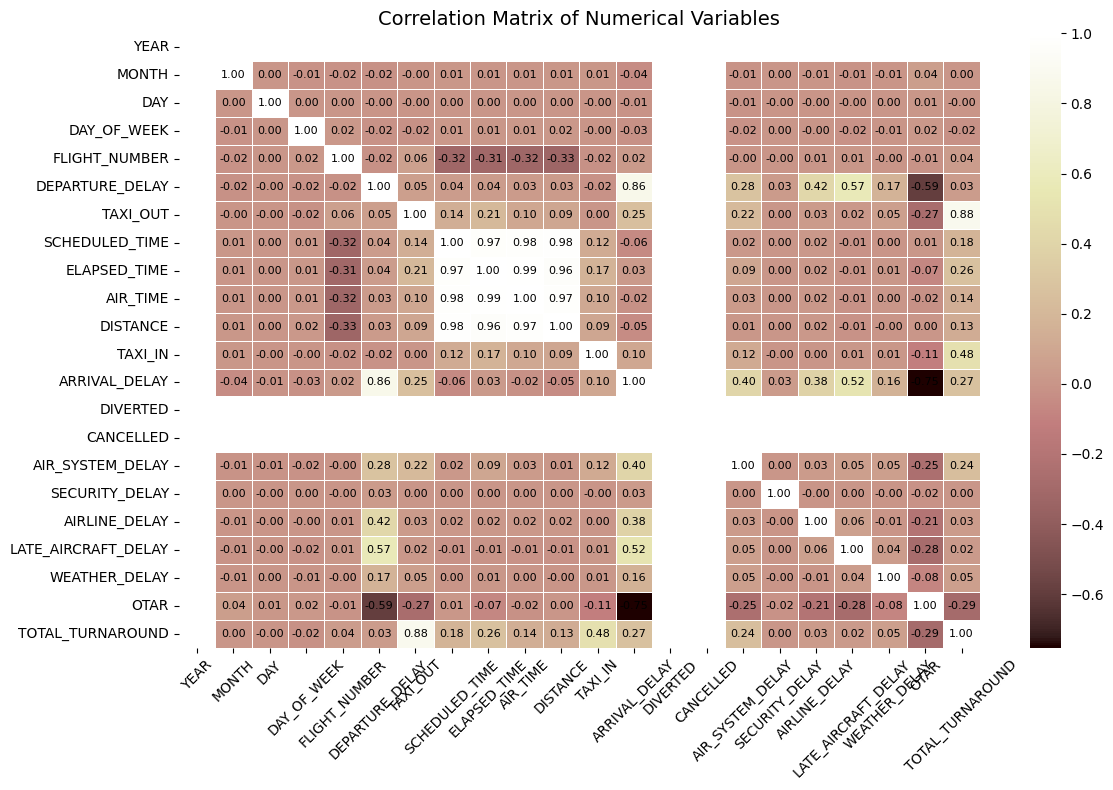

In [27]:
# Compute the correlation matrix for numerical columns only
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Visualize the correlation matrix using a heatmap with pink tones and black text
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='pink', fmt=".2f",
            linewidths=0.5, annot_kws={"size": 8, "color": "black"})  # Black annotations
plt.title('Correlation Matrix of Numerical Variables', fontsize=14, color='black')
plt.xticks(fontsize=10, color='black', rotation=45)  # Black x-axis labels
plt.yticks(fontsize=10, color='black')  # Black y-axis labels
plt.tight_layout()
plt.show()

### Insights from the Correlation Matrix:
1. **Strong Positive Correlations**:
   - **AIR_TIME and DISTANCE**: This relationship is expected, as longer flight distances naturally require more time in the air. This correlation can be further analyzed to explore efficiency in air travel for different routes.
   - **SCHEDULED_TIME and ELAPSED_TIME**: Indicates that scheduled flight durations and actual elapsed times are generally aligned, highlighting consistency in planning and execution.

2. **Strong Negative Correlations**:
   - **DEPARTURE_DELAY and OTAR**: The negative correlation emphasizes that higher departure delays lead to lower on-time arrival rates. This is a key operational insight for punctuality improvements.
   - **ARRIVAL_DELAY and OTAR**: Similarly, arrival delays negatively affect OTAR, confirming the cascading impact of delays across the journey.

3. **Weak Correlations**:
   - **Taxi Times and Other Metrics**: **TAXI_OUT** and **TAXI_IN** show low correlation with delays and flight durations, indicating that ground operations may act independently of airborne performance. This could direct a deeper analysis into taxi-specific inefficiencies.

4. **Independent Features**:
   - Columns like **DAY_OF_WEEK** show little correlation with other variables, suggesting that weekly patterns do not strongly influence delays or punctuality.

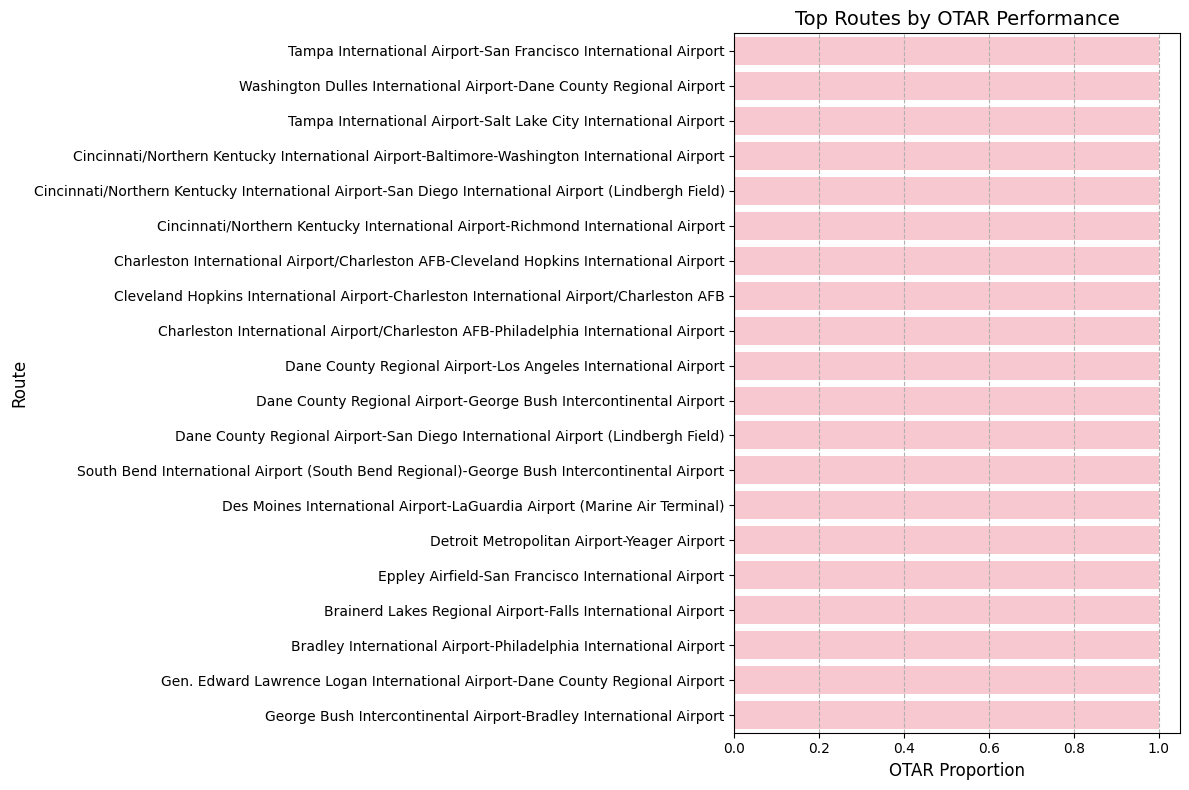

In [28]:

# Create a 'ROUTE' column by combining origin and destination airports
df['ROUTE'] = df['ORIGIN_AIRPORT'] + '-' + df['DESTINATION_AIRPORT']

# Group data by ROUTE and compute mean metrics
route_analysis = df.groupby('ROUTE')[['DISTANCE', 'AIR_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'OTAR']].mean().reset_index()

# Sort routes by OTAR to highlight performance trends
top_routes_by_otar = route_analysis.sort_values(by='OTAR', ascending=False).head(20)

# Visualize OTAR across routes with pink bars
plt.figure(figsize=(12, 8))
sns.barplot(x='OTAR', y='ROUTE', data=top_routes_by_otar, color='#ffc0cb')  # Soft pink bars
plt.title('Top Routes by OTAR Performance', fontsize=14, color='black')
plt.xlabel('OTAR Proportion', fontsize=12, color='black')
plt.ylabel('Route', fontsize=12, color='black')
plt.grid(axis='x', linestyle='--')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.tight_layout()
plt.show()

Insights:  **Route Composition**: The routes span **major hubs** (e.g., San Francisco → Eppley) and **regional airports** (e.g., Brainerd Lakes → Falls International), showcasing operational excellence at both **large-scale and smaller locations**.

**High-Performing Airports**: **Tampa International Airport**, **Dane County Regional Airport**, and **LaGuardia Airport (Marine Air Terminal)** appear multiple times. This consistency suggests robust operational processes at these airports.

**Geographical Coverage**: The routes reflect a mix of **short-haul**, **medium-haul**, and **long-haul flights**, emphasizing balanced efficiency across different flight durations.


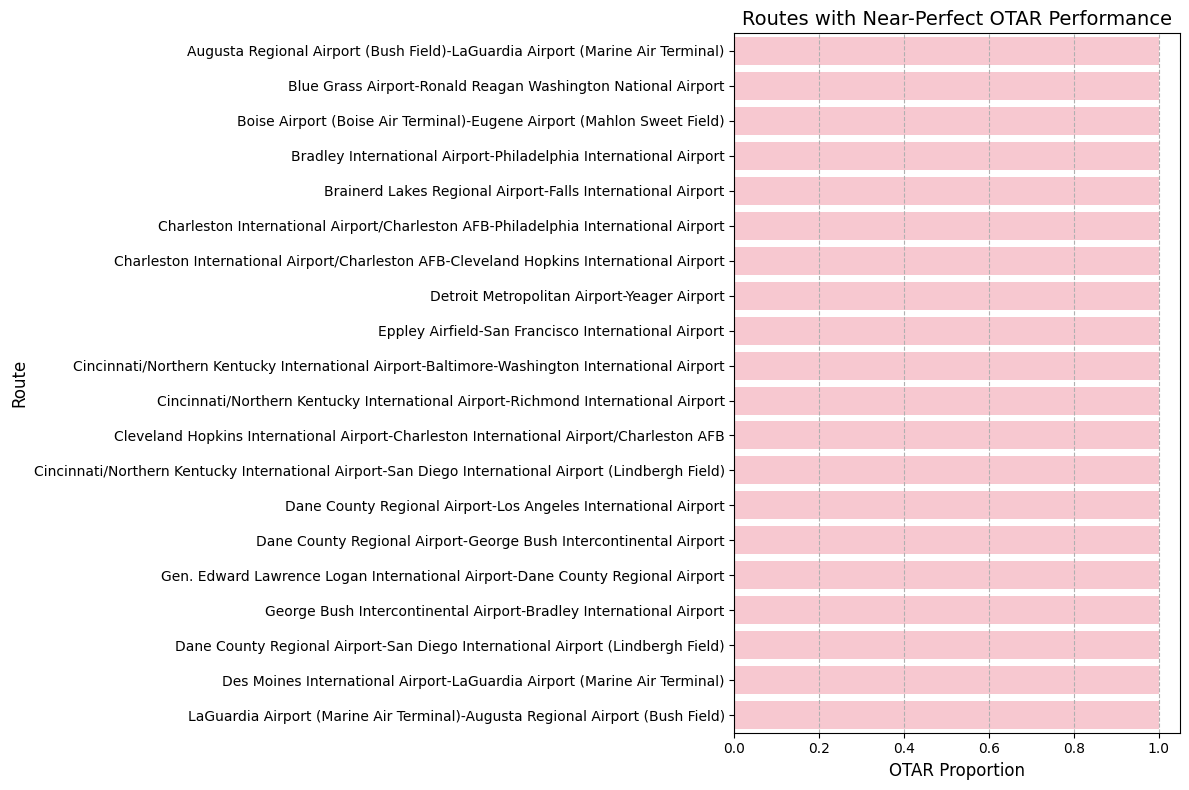

In [29]:
##Visualise into routes with near-perfect OTAR performance(e.g., OTAR > 0.9). This will help identify what distinguishes the top-performing routes from others with slightly lower punctuality.
# Filter routes with near-perfect OTAR (> 0.9) and analyze metrics
near_perfect_routes = route_analysis[route_analysis['OTAR'] > 0.9].sort_values(by='OTAR', ascending=False)

# Visualize near-perfect routes
plt.figure(figsize=(12, 8))
sns.barplot(x='OTAR', y='ROUTE', data=near_perfect_routes.head(20), color='#ffc0cb')  # Pink bars
plt.title('Routes with Near-Perfect OTAR Performance', fontsize=14, color='black')
plt.xlabel('OTAR Proportion', fontsize=12, color='black')
plt.ylabel('Route', fontsize=12, color='black')
plt.grid(axis='x', linestyle='--')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.tight_layout()
plt.show()

### Insights from Routes with Near-Perfect OTAR (On-Time Arrival Rate):
1. **Consistently High Performance**: These routes demonstrate **exceptional punctuality**, with OTAR values closely approaching **1.0**, making them highly reliable for travelers.

2. **Airports Leading in Punctuality**:**Dane County Regional Airport**, **Charleston International Airport**, and **LaGuardia Airport (Marine Air Terminal)** are frequent contributors to near-perfect OTAR, indicating effective operations at these locations.

3. **Operational Balance**: The listed routes highlight a balance between **regional connections** (e.g., Augusta → LaGuardia) and **larger hubs** (e.g., George Bush → Bradley International Airport), showcasing the applicability of high punctuality across diverse airport scales.

4. **Key Trend**: Many of the top routes overlap with those in the "perfect OTAR" category, suggesting certain systemic factors—such as favorable scheduling or efficient management—underlie their consistent performance.



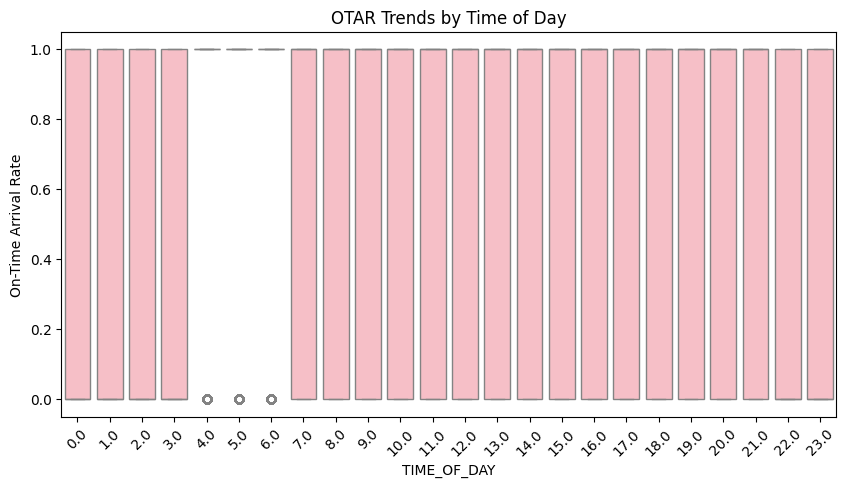

In [34]:
# Punctuality and OTAR Analysis
df['TIME_OF_DAY'] = pd.to_datetime(df['DEPARTURE_TIME'], format='%H:%M:%S').dt.hour

plt.figure(figsize=(10,5))
# Use 'lightpink' as a single color instead of a palette
sns.boxplot(x=df['TIME_OF_DAY'], y=df['OTAR'], color='lightpink')
plt.title('OTAR Trends by Time of Day')
plt.ylabel('On-Time Arrival Rate')
plt.xticks(rotation=45)
plt.show()


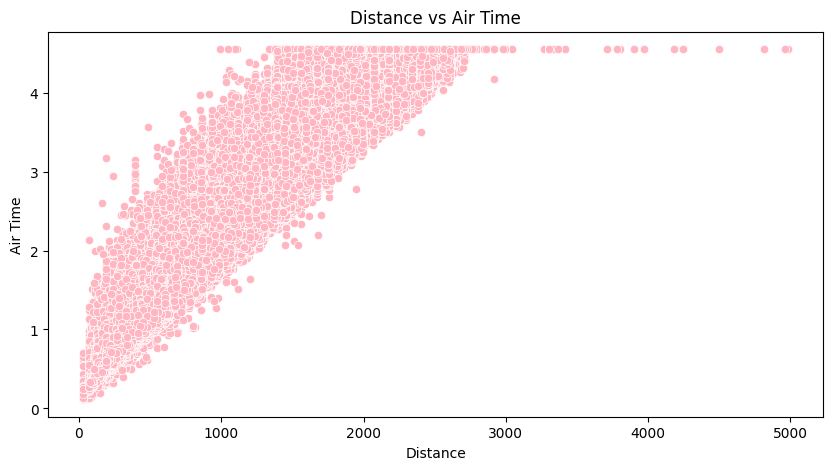

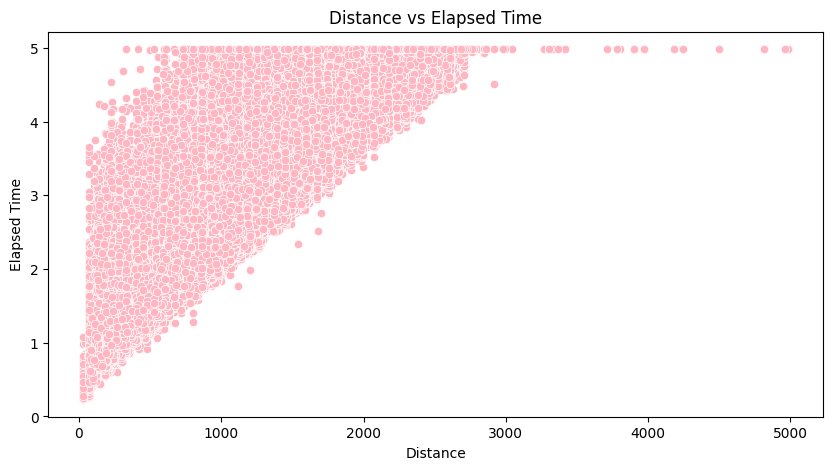

In [39]:

# Distance and Duration Correlation
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['DISTANCE'], y=df['AIR_TIME'], color='lightpink')
plt.title('Distance vs Air Time')
plt.xlabel('Distance')
plt.ylabel('Air Time')
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x=df['DISTANCE'], y=df['ELAPSED_TIME'], color='lightpink')
plt.title('Distance vs Elapsed Time')
plt.xlabel('Distance')
plt.ylabel('Elapsed Time')
plt.show()


`Strategic Recommendations for Optimizing OTAR in the U.S. Domestic Market`
1. Minimizing Departure Delays to Prevent Cascading Effects
Optimized Gate Management: Prioritize early aircraft readiness by streamlining gate allocation processes to reduce idle time before departure.
Automated Delay Prediction Systems: Deploy AI-driven models to forecast delays based on historical data and proactively adjust turnaround processes to mitigate expected disruptions.
Sequencing & Slot Management: Enhance departure scheduling precision to avoid congestion-related delays, particularly for peak hours.
Crew & Resource Optimization: Ensure timely crew availability and efficient turnaround coordination to prevent last-minute delays.
2. Addressing Seasonal Weather Disruptions
Proactive Routing Adjustments: Develop seasonal flight plans that minimize exposure to high-risk airports prone to winter weather delays.
Enhanced Weather Forecasting Integration: Leverage real-time meteorological data to make dynamic adjustments to flight schedules and optimize aircraft rotations.
Operational Contingency Protocols: Implement flexible rebooking and aircraft substitution strategies to minimize the impact of unavoidable disruptions.
3. Improving Aircraft Turnaround Efficiency
Reducing Taxi-In & Taxi-Out Times: Optimize ground handling operations by coordinating efficiently between air traffic control and ground services to streamline movement.
Addressing Late Aircraft Delays: Deploy real-time monitoring tools to anticipate inbound flight delays and proactively adjust ground staff readiness.
Ground Crew Synchronization: Enhance communication between ground operations teams to expedite refueling, baggage handling, and boarding processes.
4. Optimizing OTAR Based on Day-of-Week Patterns
Operational Adjustments for Thursdays: Identify systemic inefficiencies leading to lower OTAR on Thursdays and adjust scheduling accordingly.
Leveraging Saturday Advantage: Given Saturday exhibits the highest OTAR, analyze contributing factors and apply those operational strategies to lower-performing days.
Weekend Resource Allocation: Optimize workforce scheduling for high-punctuality days (such as Saturday) while addressing the operational gaps on lower-performing weekdays.
5. Route-Specific Optimization Strategies
Focusing on High-Performance Routes: Prioritize strategic investments in airports with historically strong OTAR to ensure a competitive edge.
Addressing Underperforming Routes: Implement targeted interventions such as adjusted turnaround strategies and congestion monitoring for routes displaying consistent delays.
Leveraging Airport Infrastructure Strengths: Establish partnerships with airports showcasing high OTAR performance to maintain streamlined operations.
6. Optimizing Night & Evening Operations
Reducing Cascading Delays at Night: Given the rise in delays for evening and night flights, rework scheduling strategies to prevent accumulation of disruptions.
Night Crew Optimization: Ensure adequate staffing levels and resource allocation to support late-night operations, preventing efficiency drops due to reduced personnel.
Managing Peak Hour Strains: Afternoon and evening flights often experience delay spikes—implement staggered scheduling strategies to reduce congestion bottlenecks.
7. Data-Driven Predictive Modelling for OTAR Improvement
Implement Machine Learning Models: Develop predictive models that analyze historical flight performance and generate actionable recommendations for OTAR optimization.
Real-Time Data Tracking: Use advanced analytics dashboards (e.g., Tableau) to monitor real-time flight performance and adapt operational strategies dynamically.
Continuous Performance Evaluation: Establish iterative workflows to refine OTAR optimization strategies based on evolving market dynamics.

Final Thoughts
IndiGo's success in the U.S. domestic market hinges on its ability to replicate operational efficiencies while adapting to new challenges. By implementing targeted interventions, leveraging AI-driven predictive analytics, and refining scheduling strategies, IndiGo can establish itself as a reliable and high-performing carrier in this competitive landscape
